## Introduction
This notebook originated from the Kaggle bot! However, it only looked at the names of the EEG files in the directory.  Rafael has added the rest.

In [2]:
# Colab settings/mount
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/My\ Drive/CSE\ 240/Project/Data/EEG

ModuleNotFoundError: No module named 'google.colab'

In [2]:
!ls

eeg_small.png  S006E04.edf  S011E02.edf  S015E04.edf  S020E02.edf  S024E04.edf
S002E03.edf    S007E01.edf  S011E03.edf  S016E01.edf  S020E03.edf  S025E01.edf
S002E04.edf    S007E02.edf  S011E04.edf  S016E02.edf  S020E04.edf  S025E02.edf
S003E01.edf    S007E03.edf  S012E01.edf  S016E03.edf  S021E01.edf  S025E03.edf
S003E02.edf    S007E04.edf  S012E02.edf  S016E04.edf  S021E02.edf  S025E04.edf
S003E03.edf    S008E01.edf  S012E03.edf  S017E01.edf  S021E03.edf  S026E01.edf
S003E04.edf    S008E02.edf  S012E04.edf  S017E02.edf  S021E04.edf  S026E02.edf
S004E01.edf    S008E03.edf  S013E01.edf  S017E03.edf  S022E01.edf  S026E03.edf
S004E02.edf    S008E04.edf  S013E02.edf  S017E04.edf  S022E02.edf  S026E04.edf
S004E03.edf    S009E01.edf  S013E03.edf  S018E01.edf  S022E03.edf  S027E01.edf
S004E04.edf    S009E02.edf  S013E04.edf  S018E02.edf  S022E04.edf  S027E02.edf
S005E01.edf    S009E03.edf  S014E01.edf  S018E03.edf  S023E01.edf  S027E03.edf
S005E02.edf    S009E04.edf  S014E02.edf  S018E04.edf

In [3]:
!pip install mne

In [4]:
import mne    # for reading .edf files (and much else)

In [11]:
file = "/Users/rishikasingh/Downloads/eeg-mood-classification-master 2/Data Exploration/S001E01.edf"
data = mne.io.read_raw_edf(file)
raw_data = data.get_data()
# you can get the metadata included in the file and a list of all channels:
info = data.info
channels = data.ch_names

Extracting EDF parameters from /Users/rishikasingh/Downloads/eeg-mood-classification-master 2/Data Exploration/S001E01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [12]:
info

<Info | 16 non-empty fields
    bads : list | 0 items
    ch_names : list | AF3, F7, F3, FC5, T7, P7, O1, O2, P8, ...
    chs : list | 14 items (EEG: 14)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 128.0 Hz
    meas_date : tuple | 2018-06-13 14:34:37 GMT
    nchan : int | 14
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 256.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    device_info : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    helium_info : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
 

In [13]:
channels

['AF3',
 'F7',
 'F3',
 'FC5',
 'T7',
 'P7',
 'O1',
 'O2',
 'P8',
 'T8',
 'FC6',
 'F4',
 'F8',
 'AF4']

In [14]:
raw_data.shape

(14, 46080)

## Exploratory Analysis
The following packages are often useful.

In [15]:
#from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
#import os # accessing directory structure
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#from scipy.io import loadmat   # this function imports .MAT files (MatLab files) into Python (as directories)

### EEG Data

The actual surface electrode readings are given in the dat6 array. For example, at time 1000 we have the following microvolt measurments at each of the 25 leads.

In [16]:
raw_data[:, 1000]

array([4.27519883e-05, 4.65109476e-05, 2.76258476e-05, 5.37701260e-05,
       1.93465649e-05, 1.24181482e-05, 1.06720265e-05, 1.67187913e-05,
       8.44941075e-05, 2.36010758e-05, 4.19182986e-05, 2.76447411e-05,
       2.96294392e-05, 1.54665940e-04])

Lets take a look at lead 10.

In [17]:
channel = 1   # occipital lead  O1 
raw_data[channel, : 50]

array([ 8.65048524e-07,  2.36749975e-06,  2.36749975e-06,  8.65048524e-07,
       -1.71058215e-06, -2.71221630e-06, -2.21139922e-06, -7.08947997e-07,
       -2.08130922e-07, -7.08947997e-07, -1.71058215e-06, -2.21139922e-06,
       -2.21139922e-06, -1.71058215e-06, -2.71221630e-06, -2.71221630e-06,
       -1.20976507e-06,  2.36749975e-06,  4.44231334e-06,  1.86668267e-06,
       -5.28784697e-06, -1.25139219e-05, -1.55903696e-05, -1.14407425e-05,
       -3.28457867e-06,  5.44394749e-06,  1.10960259e-05,  1.20976601e-05,
        1.00943918e-05,  7.01794401e-06,  3.94149627e-06,  2.36749975e-06,
        1.86668267e-06,  2.36749975e-06,  3.94149627e-06,  5.44394749e-06,
        5.94476457e-06,  4.44231334e-06, -2.08130922e-07, -6.36102641e-06,
       -1.04391083e-05, -9.93829123e-06, -5.78866404e-06,  8.65048524e-07,
        5.44394749e-06,  5.94476457e-06,  3.44067919e-06, -2.08130922e-07,
       -3.28457867e-06, -5.28784697e-06])

In [18]:
channels[channel]

'F7'

In [19]:
raw_data[channel,:]

array([8.65048524e-07, 2.36749975e-06, 2.36749975e-06, ...,
       9.41601150e-05, 9.31584809e-05, 8.95812161e-05])

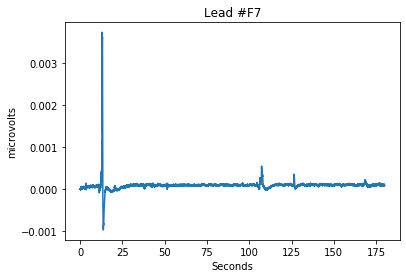

In [20]:
%matplotlib inline

import matplotlib.pyplot as plt

x = np.linspace(0, len(raw_data[channel, :]) / 256., len(raw_data[channel, :]))
y = raw_data[channel, :]

plt.plot(x, y)
plt.title('Lead #' + channels[channel]) 
plt.xlabel('Seconds'); plt.ylabel('microvolts')
plt.show()

Let's create a spectrogram for this lead.

[5.41662943e-05 5.26638431e-05 5.57402909e-05 ... 8.44299547e-05
 8.44299547e-05 8.49307718e-05]


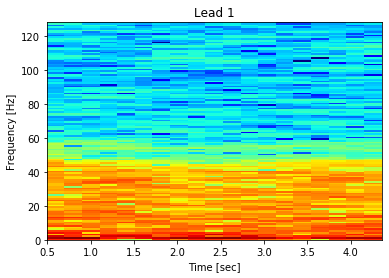

In [21]:
from scipy import signal
plt.set_cmap('jet')
x = raw_data[channel, 1280:2560]
print(x)
#x = raw_data[channel, 1280:2561]
#fs = 256  # Assume 512 Hz sampling rate for now...   # SampFreq[0, 0] 
#f, t, Sxx = signal.spectrogram(x, fs, window = signal.tukey(512, .25))
fs = 256  # Assume 512 Hz sampling rate for now...   # SampFreq[0, 0] 
f, t, Sxx = signal.spectrogram(x, fs, window = signal.tukey(256), noverlap = 204)

plt.pcolormesh(t, f, np.log10(Sxx))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Lead ' + str(channel)) # + LsEEG[channel]

#plt.show()
fig, ax = plt.subplots( nrows=1, ncols=1 )
fig.figsize= (800, 800)
ax.pcolormesh(t, f, np.log10(Sxx))
fig.savefig('eeg_small.png')   # save the figure to file
plt.close(fig)


In [22]:
print(len(t))

20


## Run this to generate images

In [34]:
import matplotlib.pyplot as plt # plotting
import mne
import numpy as np # linear algebra
import os
from scipy import signal
from sklearn.preprocessing import StandardScaler

# If folders don't exist already create them in the home directory.
if not os.path.exists("raw_images"):
    os.mkdir("raw_images")
if not os.path.exists("raw_images/relaxed"):
    os.mkdir("raw_images/relaxed")
if not os.path.exists("raw_images/concentration"):
    os.mkdir("raw_images/concentration")
if not os.path.exists("../spectrogram_images"):
    os.mkdir("../spectrogram_images")
if not os.path.exists("../spectrogram_images/relaxed"):
    os.mkdir("../spectrogram_images/relaxed")
if not os.path.exists("../spectrogram_images/concentration"):
    os.mkdir("../spectrogram_images/concentration")

for filename in os.listdir('.'):
    if not filename.startswith("S002"):
      continue
    file_name = os.path.join('.',filename)
  
    file_type = 0 if filename.split(".")[0].endswith("E01") or filename.split(".")[0].endswith("E03") else 1
    data = mne.io.read_raw_edf(file_name)
    raw_data = data.get_data()
    info = data.info
    channels = data.ch_names
    for part in range(36):
        for index, channel in enumerate(channels):
            print("Processing %s channel of file %s part %s." % (channel, filename, part))
            folder_name = filename.split(".")[0] + "_" + str(part)
            '''
            folder_path = os.path.join('raw_images/relaxed',folder_name) if file_type == 0 else os.path.join('raw_images/concentration',folder_name)
            if not os.path.exists(folder_path):
                print("creating folder %s." % (folder_name))
                os.mkdir(folder_path)
            new_filename = "%s_%s.png" % (folder_name, channel)
            # path to store raw time domain images of the signals
            # choose folder based on file type
            start = part * 1280
            end = (part+1) * 1280
            new_file_path = os.path.join(folder_path, new_filename)
            x = np.linspace(0, len(raw_data[index, start:end]) / 256., len(raw_data[index, start:end]))
            y = raw_data[index, start:end]
            fig, ax = plt.subplots( nrows=1, ncols=1 )
            fig.figsize= (800, 800)
            ax.plot(x, y)
            #ax.title('Lead #' + channel) 
            #ax.xlabel('Seconds'); plt.ylabel('microvolts')
            fig.savefig(new_file_path)   # save the figure to file
            plt.close(fig)
            #plt.plot(x, y)
            #plt.show()
            '''
            start = part * 1280
            end = (part+1) * 1280
            # path to store frequency domain spectrogram images of the signals
            folder_path = os.path.join('../spectrogram_images/relaxed',folder_name) if file_type == 0 else os.path.join('../spectrogram_images/concentration',folder_name)
            if not os.path.exists(folder_path):
                print("creating folder %s." % (folder_name))
                os.mkdir(folder_path)
            new_filename = "%s_%s.png" % (folder_name, channel)
            new_file_path = os.path.join(folder_path, new_filename)
            x = raw_data[index, start:end]
            fs = 256  # Assume 512 Hz sampling rate for now...   # SampFreq[0, 0] 
            #f, t, Sxx = signal.spectrogram(x, fs, window = signal.tukey(512, .25))
            f, t, Sxx = signal.spectrogram(x, fs, window = signal.tukey(256), noverlap = 204)
            fig, ax = plt.subplots( nrows=1, ncols=1 )
            fig.figsize= (800, 800)
            ax.pcolormesh(t, f, np.log10(Sxx))
            #ax.ylabel('Frequency [Hz]')
            #ax.xlabel('Time [sec]')
            #plt.title('Lead ' + channel) # + LsEEG[channel]
            #ax.set_cmap('jet')
            #plt.show()
            fig.savefig(new_file_path)   # save the figure to file
            plt.close(fig)
    
    '''
    f = pyedflib.EdfReader(file_name)
    n = f.signals_in_file
    signal_labels = f.getSignalLabels()
    sigbufs = np.zeros((n, f.getNSamples()[0]))
    for i in np.arange(n):
        sigbufs[i, :] = f.readSignal(i)
    new_filename = filename.replace(".edf",".csv")
    new_file_path = os.path.join('spectrogram_files',new_filename)
    os.mkdir(new_file_path)
    with open(new_file_path, mode='w') as record_file:
        record_writer = csv.writer(record_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        for record in sigbufs:
            record_writer.writerow(record)
    '''

## Convert to SITK

In [99]:
'''From audioProcessingUtil.py'''

import numpy as np
import librosa
from scipy import interpolate
import pywt
from matplotlib.image import imsave
from scipy.signal import butter, lfilter, freqz
from matplotlib import pyplot as plt
#from imageProcessingUtil import ImageProcessing
import SimpleITK as sitk

In [100]:
'''From imageProcessingUtil.py'''

import SimpleITK as sitk
import numpy as np
import scipy.stats as stats
import pandas as pd
from skimage.feature import greycomatrix, greycoprops

In [101]:
'Convert spectrogram to sitk image'
db_sitk = sitk.GetImageFromArray(Sxx)
#db_sitk = sitk.GetImageFromArray(ImageProcessing.median_image_filter(db_sitk,radius=(3,3,3)))

In [103]:
print(db_sitk)

Image (0x7fddb6a2a2c0)
  RTTI typeinfo:   itk::Image<double, 2u>
  Reference Count: 1
  Modified Time: 791
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 0
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 2
    Index: [0, 0]
    Size: [20, 129]
  BufferedRegion: 
    Dimension: 2
    Index: [0, 0]
    Size: [20, 129]
  RequestedRegion: 
    Dimension: 2
    Index: [0, 0]
    Size: [20, 129]
  Spacing: [1, 1]
  Origin: [0, 0]
  Direction: 
1 0
0 1

  IndexToPointMatrix: 
1 0
0 1

  PointToIndexMatrix: 
1 0
0 1

  Inverse Direction: 
1 0
0 1

  PixelContainer: 
    ImportImageContainer (0x7fddb5ce20d0)
      RTTI typeinfo:   itk::ImportImageContainer<unsigned long, double>
      Reference Count: 1
      Modified Time: 792
      Debug: Off
      Object Name: 
      Observers: 
        none
      Pointer: 0x7fddb3c938

## Feature Extraction

In [104]:
class ImageProcessing(object):

    def __init__(self):
        pass

    @staticmethod
    def rescaleAmplitude(db_sitk,scale_range = (0,1)):
        mini = np.min(db_sitk)
        maxi = np.max(db_sitk)

        new_min = scale_range[0]
        new_max = scale_range[1]

        new_data = ((new_max - new_min)*(image - mini)/(maxi - mini)) + new_min
        # print("Old min-max :{}-{}, New min-max: {}:{}".format(mini,maxi,new_min,new_max))
        return new_data

    @staticmethod
    def getEnergy(db_sitk):
        return np.sum(np.square(db_sitk))

    @staticmethod
    def getEntropy(arr):
        lg = np.log2(arr)
        lg[np.isneginf(lg)] = 0

        return np.sum(-1.0*arr*lg)


    @staticmethod
    def get10Percentile(arr):
        return (np.percentile(arr, 10))

    @staticmethod
    def get90Percentile(arr):
        return (np.percentile(arr, 90))
    
    @staticmethod
    def getInterquartileRange(arr):
        return np.percentile(arr, 75) - np.percentile(arr, 25)

    @staticmethod
    def getMeanAbsoluteDeviation(arr):
        return (np.mean(np.absolute((np.mean(arr) - arr))))
    @staticmethod
    def getRobustMeanAbsoluteDeviation(arr):
        prcnt10 = ImageProcessing.get10Percentile(arr)
        prcnt90 = ImageProcessing.get90Percentile(arr)
        percentileArray = arr[(arr >= prcnt10) * (arr <= prcnt90)]

        return np.mean(np.absolute(percentileArray - np.mean(percentileArray)))

    @staticmethod
    def getRootMeanSquareError(arr):
        return (np.sqrt((np.sum(arr ** 2)) / float(arr.size)))


    @staticmethod
    def getRange(arr):
        return np.max(arr) - np.min(arr)
    
    @staticmethod
    def getArrayHistogram(arr,bins=np.arange(256),density = True):

        hist,bins =  np.histogram(arr,bins=bins)
        if density == True:
            hist = hist/float(np.sum(hist))

        return hist,bins

In [105]:
def getShapeFeatures(labelled_image):

        """
        :param labelled_image: Image with different labels for which the features are to be extracted.
                (sitk image or numpy array)
        :return:
        """

        if isinstance(labelled_image,(np.ndarray)):
            labelled_image = sitk.GetImageFromArray(labelled_image)

        labelShapeStatisticsImageFilter = sitk.LabelShapeStatisticsImageFilter()
        labelShapeStatisticsImageFilter.Execute(labelled_image)


        labelled_image = sitk.GetArrayFromImage(labelled_image)
        max_label = np.max(labelled_image)

        labels = labelShapeStatisticsImageFilter.GetLabels()

        centroidy = []
        roundness = []
        flatness = []
        
        for i in range(1,max_label+1):
            centroid = labelShapeStatisticsImageFilter.GetCentroid(i)
            centroidy.append(centroid[0])
            roundness.append(labelShapeStatisticsImageFilter.GetRoundness(i))
            flatness.append(labelShapeStatisticsImageFilter.GetFlatness(i))

        shapeFeatures = np.column_stack((centroidy,roundness,flatness))

        return shapeFeatures

In [106]:
@staticmethod
def getPixelFeatures(Sxx,labelled_image,file_name,cls_label,histogram_bins = np.arange(256),histogram_density = True):
    if isinstance(image,(sitk.Image)):
        image = sitk.GetArrayFromImage(image)
if isinstance(labelled_image,(sitk.Image)):
    labelled_image = sitk.GetArrayFromImage(labelled_image)


minimums = []
maximums = []
means = []
medians = []
variances = []
energies = []
entropies = []
tenPercentiles = []
nintyPercentiles = []
interquartileRanges = []
ranges = []
meanAbsoluteDeviations = []
robustMeanAbsoluteDeviations = []
rootMeanSquareErrors = []
skewness = []
kurtosis = []
cls_labels = []
file_names = []

max_label = np.max(labelled_image)

NameError: name 'labelled_image' is not defined

In [107]:
for i in range(1,max_label+1):
    label = i
    label_indices = np.where(labelled_image == label)
    label_pixels = image[label_indices]
    minimums.append(np.min(label_pixels))
    maximums.append(np.max(label_pixels))
    means.append(np.mean(label_pixels))
    medians.append(np.median(label_pixels))
    variances.append(np.var(label_pixels))

    pdf,bins = ImageProcessing.getArrayHistogram(label_pixels,bins = histogram_bins,density = histogram_density)
    
    energies.append(ImageProcessing.getEnergy(pdf))
    entropies.append(ImageProcessing.getEntropy(pdf))

    tenPercentiles.append(ImageProcessing.get10Percentile(label_pixels))
    nintyPercentiles.append(ImageProcessing.get90Percentile(label_pixels))
    interquartileRanges.append(ImageProcessing.getInterquartileRange(label_pixels))
    ranges.append(ImageProcessing.getRange(label_pixels))
    meanAbsoluteDeviations.append(ImageProcessing.getMeanAbsoluteDeviation(label_pixels))
    robustMeanAbsoluteDeviations.append(ImageProcessing.getRobustMeanAbsoluteDeviation(label_pixels))
    rootMeanSquareErrors.append(ImageProcessing.getRootMeanSquareError(label_pixels))
    skewness.append(stats.skew(label_pixels))
    kurtosis.append(stats.kurtosis(label_pixels))
    cls_labels.append(cls_label)
    file_names.append(file_name)

pixelFeatures = np.column_stack((file_names,cls_labels,minimums,maximums,means,medians,variances,energies,
                                 entropies,tenPercentiles,nintyPercentiles,
                                 interquartileRanges,ranges,meanAbsoluteDeviations,robustMeanAbsoluteDeviations,
                                 rootMeanSquareErrors, skewness,kurtosis))
return pixelFeatures

NameError: name 'max_label' is not defined

In [108]:
@staticmethod
def getPixelFeatureVector(image,histogram_bins = np.arange(256),histogram_density = True):
    if isinstance(image,(sitk.Image)):
        image = sitk.GetArrayFromImage(image)


        # dividing the image into 4 parts wrt y axis
    seg_size = int(image.shape[0]/4)

    pixelFeatures = None

    for i in range(4):

        seg_image = image[int(i*seg_size):int((i+1)*seg_size),:]

        minimums = []
        maximums = []
        means = []
        medians = []
        variances = []
        energies = []
        entropies = []
        tenPercentiles = []
        nintyPercentiles = []
        interquartileRanges = []
        ranges = []
        meanAbsoluteDeviations = []
        robustMeanAbsoluteDeviations = []
        rootMeanSquareErrors = []
        skewness = []
        kurtosis = []

        label_pixels = seg_image.ravel()

        minimums.append(np.min(label_pixels))
        maximums.append(np.max(label_pixels))
        means.append(np.mean(label_pixels))
        medians.append(np.median(label_pixels))
        variances.append(np.var(label_pixels))

        pdf,bins = ImageProcessing.getArrayHistogram(label_pixels,bins = histogram_bins,density = histogram_density)

        energies.append(ImageProcessing.getEnergy(pdf))
        entropies.append(ImageProcessing.getEntropy(pdf))
        
        tenPercentiles.append(ImageProcessing.get10Percentile(label_pixels))
        nintyPercentiles.append(ImageProcessing.get90Percentile(label_pixels))
        interquartileRanges.append(ImageProcessing.getInterquartileRange(label_pixels))
        ranges.append(ImageProcessing.getRange(label_pixels))
        meanAbsoluteDeviations.append(ImageProcessing.getMeanAbsoluteDeviation(label_pixels))
        robustMeanAbsoluteDeviations.append(ImageProcessing.getRobustMeanAbsoluteDeviation(label_pixels))
        rootMeanSquareErrors.append(ImageProcessing.getRootMeanSquareError(label_pixels))            
        skewness.append(stats.skew(label_pixels))
        kurtosis.append(stats.kurtosis(label_pixels))


        pixelFeatureVector = np.column_stack((minimums,maximums,means,medians,variances,energies,entropies,
                                              tenPercentiles,nintyPercentiles,interquartileRanges,ranges,
                                              meanAbsoluteDeviations,robustMeanAbsoluteDeviations,rootMeanSquareErrors,
                                              skewness,kurtosis))

        if pixelFeatures is None:
            pixelFeatures = pixelFeatureVector
        else:
            pixelFeatures = np.concatenate((pixelFeatures,pixelFeatureVector),axis = 1)

    return pixelFeatures

In [109]:
@staticmethod
def getPixelFeatureVectorColumns():
    pixel_cols = []
    features = ['Minimum','Maximum','Mean','Median','Variance','Energy','Entropy','TenPentile','NintyPercentile',
                                   'InterQuartileRange','Range','MeanAbsoluteDeviation','RobustMeanAbsoluteDeviation',
                                    'RootMeanSquareError','Skewness','Kurtosis']

    for i in range(4):
        for feature in features:
            pixel_cols.append("{}_{}_{}".format("FirstOrder",feature,i))

    return pixel_cols

In [110]:
@staticmethod
def _entropy(p):
    p = p.ravel()
    return -np.dot(np.log2(p+(p==0)),p)

In [111]:
@staticmethod
def getGLCMFeatureVector(image,distances = [1,3,5],angles =[0,np.pi/4.0,np.pi/2.0, 3*np.pi/4.0]):
    if isinstance(image,(sitk.Image)):
        image = sitk.GetArrayFromImage(image)

    feature_vector = None

        # dividing the image into 4 parts wrt y axis
    seg_size = image.shape[0]/4
    
    for i in range(4):

        seg_image = image[int(i*seg_size):int((i+1)*seg_size),:]

        glcm = greycomatrix(seg_image,distances, angles, 256, symmetric=True, normed=True)

        for d in range(len(distances)):
            for a in range(len(angles)):
                p = glcm[:,:,d,a]

                feats = np.zeros(13,np.double)
                maxv = len(p)
                k = np.arange(maxv)
                k2 = k**2
                tk = np.arange(2*maxv)
                tk2 = tk**2
                i,j = np.mgrid[:maxv,:maxv]
                ij = i*j
                i_j2_p1 = (i - j)**2
                i_j2_p1 += 1
                i_j2_p1 = 1. / i_j2_p1
                i_j2_p1 = i_j2_p1.ravel()
                px_plus_y = np.empty(2*maxv, np.double)
                px_minus_y = np.empty(maxv, np.double)
                pravel = p.ravel()
                px = p.sum(0)
                py = p.sum(1)
                ux = np.dot(px, k)
                uy = np.dot(py, k)
                vx = np.dot(px, k2) - ux**2
                vy = np.dot(py, k2) - uy**2
                sx = np.sqrt(vx)
                sy = np.sqrt(vy)
                px_plus_y = np.zeros(shape=(2*p.shape[0] ))
                px_minus_y = np.zeros(shape=(p.shape[0]))
                for i in range(p.shape[0]):
                    for j in range(p.shape[0]):
                        p_ij = p[i,j]
                        px_plus_y[i+j] += p_ij
                        px_minus_y[np.abs(i-j)] += p_ij
                feats[0] = np.sqrt(np.dot(pravel, pravel))                        # Energy
                feats[1] = np.dot(k2, px_minus_y)                                 # Contrast
                if sx == 0. or sy == 0.:
                    feats[2] = 1.
                else:
                    feats[2] = (1. / sx / sy) * (np.dot(ij.ravel(), pravel) - ux * uy) # Correlation
                feats[3] = vx                                                     #Sum of Squares: Variance
                feats[4] = np.dot(i_j2_p1, pravel)                                # Inverse of Difference Moment
                feats[5] = np.dot(tk, px_plus_y)                                  # Sum Average
                feats[7] = ImageProcessing._entropy(px_plus_y)                                    # Sum Entropy
                feats[6] = ((tk-feats[7])**2*px_plus_y).sum()                     # Sum Variance                    feats[8] = ImageProcessing._entropy(pravel)                                       # Entropy
                feats[9] = px_minus_y.var()                                       # Difference Variance
                feats[10] = ImageProcessing._entropy(px_minus_y)                                  # Difference Entropy
                HX = ImageProcessing._entropy(px)
                HY = ImageProcessing._entropy(py)
                crosspxpy = np.outer(px,py)
                crosspxpy += (crosspxpy == 0)
                crosspxpy = crosspxpy.ravel()
                HXY1 = -np.dot(pravel, np.log2(crosspxpy))
                HXY2 = ImageProcessing._entropy(crosspxpy)
                if max(HX, HY) == 0.:
                    feats[11] = (feats[8]-HXY1)                                    # Information Measure of Correlation 1
                else:
                    feats[11] = (feats[8]-HXY1)/max(HX,HY)
                feats[12] = np.sqrt(max(0,1 - np.exp( -2. * (HXY2 - feats[8]))))  # Information Measure of Correlation 2

                feats = np.column_stack(feats)
                if feature_vector is None:
                    feature_vector = feats
                else:
                    feature_vector = np.concatenate((feature_vector,feats),axis=1)
        return feature_vector

In [112]:
@staticmethod
def getGLCMColumnNames(distances = [1,3,5],angles =[0,np.pi/4.0,np.pi/2.0, 3*np.pi/4.0]):
    glcm_columns = []

    for i in range(4):
        for j in range(len(distances)):
            for k in range(len(angles)):
                glcm_columns.append('Glcm_ENERGY_{}_{}_seg_{}'.format(distances[j],angles[k],i))
                glcm_columns.append('Glcm_CONTRAST_{}_{}_seg_{}'.format(distances[j],angles[k],i))
                glcm_columns.append('Glcm_CORRELATION_{}_{}_seg_{}'.format(distances[j],angles[k],i))
                glcm_columns.append('Glcm_VARIANCE_{}_{}_seg_{}'.format(distances[j],angles[k],i))
                glcm_columns.append('Glcm_INVERSE_DIFFERENCE_OF_MOMENT_{}_{}_seg_{}'.format(distances[j],angles[k],i))
                glcm_columns.append('Glcm_SUM_AVERAGE_{}_{}_seg_{}'.format(distances[j],angles[k],i))
                glcm_columns.append('Glcm_SUM_ENTROPY_{}_{}_seg_{}'.format(distances[j],angles[k],i))
                glcm_columns.append('Glcm_SUM_VARIANCE_{}_{}_seg_{}'.format(distances[j],angles[k],i))
                glcm_columns.append('Glcm_ENTROPY_{}_{}_seg_{}'.format(distances[j],angles[k],i))
                glcm_columns.append('Glcm_DIFFERENCE_VARIANCE_{}_{}_seg_{}'.format(distances[j],angles[k],i))
                glcm_columns.append('Glcm_DIFFERENCE_ENTROPY_{}_{}_seg_{}'.format(distances[j],angles[k],i))
                glcm_columns.append('Glcm_INFORMATION_MEASURE_CORRELATION_1_{}_{}_seg_{}'.format(distances[j],angles[k],i))
                glcm_columns.append('Glcm_INFORMATION_MEASURE_CORRELATION_2_{}_{}_seg_{}'.format(distances[j],angles[k],i))

    return glcm_columns


@staticmethod
def getPixelFeaturesHeaders():
    return ['FileName','ClassLabel','Minimum','Maximum','Mean','Median','Variance','Energy','Entropy','TenPentile',
            'NintyPercentile','InterQuartileRange','Range','MeanAbsoluteDeviation','RobustMeanAbsoluteDeviation',
            'RootMeanSquareError','Skewness','Kurtosis']

In [113]:
@staticmethod
def histogram_equalize(image,radius = (1,1,1), alpha = 0.6, beta = 0.3):
    if isinstance(image,(np.ndarray)):
        image = sitk.GetImageFromArray(image)


    filter = sitk.AdaptiveHistogramEqualizationImageFilter()

    heq = sitk.AdaptiveHistogramEqualization(image,radius,alpha = alpha, beta = beta)
        # mean = sitk.Mean(heq,(1,1))

    return sitk.GetArrayFromImage(heq)


@staticmethod
def median_image_filter(image,radius = (1,1,1)):
    if isinstance(image,(np.ndarray)):
        image = sitk.GetImageFromArray(image)

    med = sitk.Median(image,radius)
    
    return sitk.GetArrayFromImage(med)

## SVM Classifier

In [114]:
#from imageProcessingUtil import ImageProcessing
import sys
import numpy as np
import pandas as pd
#from audio import Audio
#from audioProcessingUtil import AudioProcessing
from time import time
import librosa

In [115]:
def svm_predict(training_samples, training_labels, test_samples, test_lables):
    from sklearn.svm import SVC
    from sklearn.svm import LinearSVC
    from sklearn.model_selection import GridSearchCV

    parameters = {'kernel':('linear','rbf','poly','sigmoid'), 'C':(1, 10,100,1000,10000)}

    # clf = GridSearchCV(SVC(probability=True), parameters)
    # clf.fit(training_samples,training_labels)
    # pred = clf.predict_proba(test_samples)
    # return pred

    clf = GridSearchCV(SVC(probability=False), parameters)
    clf.fit(training_samples,training_labels)
    pred = clf.predict(test_samples)
    from sklearn.metrics import accuracy_score
    acc = accuracy_score(test_lables,pred)

    with open("result_labels.csv","wb") as outfile:
        np.savetxt(outfile,pred)

    return acc

In [116]:
def svm_best_parameters(X,y,Cs  = [0.001,0.01,0.1,1,10,100,1000,10000,100000], kernels = ['rbf','linear','poly','sigmoid'], nfolds = 5):
    from sklearn.model_selection import GridSearchCV
    from sklearn import svm

    param_grid = {'C': Cs, 'kernel' : kernels}
    grid_search = GridSearchCV(svm.SVC(), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    return grid_search.best_params_

In [117]:
class SoundClassifier(object):
    def __init__(self,database,featuresPath = None):
        self.database = database
        self.filenames = None
        self.features = None
        self.cluster_features = None
        self.cluster_normalizer = None
        self.normalized_data = None
        self.cluster_model = None
        self.labels  = None
        self.bag_of_features = None
        self.feature_columns = None

        if featuresPath is not None:
            features = pd.read_excel(featuresPath)
            self.features = features

In [118]:
class SpectrogramClassifier(SoundClassifier):
    def __init__(self,database,featuresPath = None):
        super(SpectrogramClassifier,self).__init__(database,featuresPath)

        self.feature_columns = ['FileName','ClassLabel','SegmentLabel']

    def extractFeatures(self,fs = 24000,n_fft = 512,win_length = 480,hop_length = 120,
                              spec_range = (0,255),spec_pixel_type = np.uint8,spec_log_amplitude = True,
                              spec_label_range = (0,255),spec_label_pixel_type = np.uint8,spec_label_log_amplitude = True,
                              initial_labels = [25,50,75,100,125,150,175,200,225,250], no_labels = 2 ,
                              histogram_bins = np.arange(256),histogram_density = True,
                              glcm_distances = [1,3,5], glcm_angles = [0,np.pi/4.0,np.pi/2.0, 3*np.pi/4.0],
                              n_mfcc = 60,lpc_order = 25,max_segments_per_file = 5 ):
        features = None

        # iterating through all categories
        for cls in self.database.classes:
            print("Class : {}".format(cls))

            # iterating through files of one particular category
            for file in self.database.get_files(cls):
                print("File : {}".format(file))

                # resampling segment to 24000 khz
                #audio = Audio(file,sampling_rate=fs)

                # removing low frequence components below 500Hz
                #data = AudioProcessing.butter_highpass_filter(audio.data,500,fs)
                
                # Applying k-means and obtianing labels from the spectrogram
               # spec_labels = AudioProcessing.get_spectrogram_label(data,n_fft=n_fft,
                                                        #  win_length=win_length,
                                                         # hop_length=hop_length,
                                                         # range=spec_label_range,
                                                          #pixel_type = spec_label_pixel_type,
                                                          #log_amplitude=spec_label_log_amplitude,
                                                          #initial_labels=initial_labels,
                                                          #no_labels=no_labels)

                # obtaining segments from audio file using the labels obtained from spectrogram segmentation
                segments = AudioProcessing.segmentAudioBySpectrograms(data,spec_labels,win_length,hop_length,max_segments=max_segments_per_file)

                # extracting different features
                print("Extracting features..")
                i = 0
                
                 # iterating through all segments to obtain features
                for segment in segments:
                    seg_data = data[segment[0]:segment[1]]

                    # obtaining spectrogram with higher resolution of the segment
                    seg_spec = AudioProcessing.get_spectrogram(seg_data,n_fft=2*n_fft,win_length=win_length,hop_length=int(hop_length/2),range=spec_range,pixel_type = spec_pixel_type,log_amplitude=spec_log_amplitude)

                    # median filtering with radius - 3
                    med = ImageProcessing.median_image_filter(seg_spec,radius=(3,3,3))

                    general_info = np.column_stack([file,cls,i])

                    # first order statistics of the spectrogram image
                    pixelFeatures = ImageProcessing.getPixelFeatureVector(med,histogram_bins=histogram_bins,histogram_density = histogram_density)

                    # extracting acoustic features
                    audio_features = AudioProcessing.get_audio_features(seg_data,fs,n_fft,hop_length,n_mfcc)
                    audio_features_mean = np.mean(audio_features,axis=0)
                    audio_features_mean = np.column_stack(audio_features_mean)
                    audio_features_var = np.var(audio_features,axis=0)
                    audio_features_var = np.column_stack(audio_features_var)

                    # obtaining glcm features
                    glcmFeatures = ImageProcessing.getGLCMFeatureVector(med,distances=glcm_distances,angles=glcm_angles)

                    # concatenating all the features to obtain feature vector of a segment
                    singleSegFeatures = np.concatenate((general_info,pixelFeatures,audio_features_mean,audio_features_var,glcmFeatures),axis = 1)


                    if features is None:
                        features = singleSegFeatures

                    else:
                        features = np.concatenate((features,singleSegFeatures))

                    i = i + 1
                    
        # forming header columns for the dataframe
        pixelColumns = ImageProcessing.getPixelFeatureVectorColumns()

        glcmColumns = ImageProcessing.getGLCMColumnNames(distances=glcm_distances,angles=glcm_angles)

        self.feature_columns.extend(pixelColumns)

        audio_feature_mean_columns = AudioProcessing.get_audio_feature_columns(n_mfcc,'mean')
        audio_feature_var_columns = AudioProcessing.get_audio_feature_columns(n_mfcc,'var')
        self.feature_columns.extend(audio_feature_mean_columns)
        self.feature_columns.extend(audio_feature_var_columns)

        self.feature_columns.extend(glcmColumns)
        self.features = features

        return features

    def save_features(self,featuresPath):
        df = pd.DataFrame(self.features,columns= self.feature_columns)
        df.to_excel(featuresPath)
    def train(self,featuresPath,validationNo = 1):
        df = pd.read_excel(featuresPath)

        # if self.database.db_name == 'esc10' or self.database.db_name == 'esc50':
        #     df = df.drop('Maximum',axis = 1)
        #     df = df.drop('Range',axis = 1)
        #     df = df.drop('SegmentLabel',axis = 1)

        # if self.database.db_name == 'freiburg':


        try:

            df = df.drop('FirstOrder_Maximum_0',axis = 1)
            df = df.drop('FirstOrder_Range_0',axis = 1)

            df = df.drop('FirstOrder_Maximum_1',axis = 1)
            df = df.drop('FirstOrder_Range_1',axis = 1)

            df = df.drop('FirstOrder_Maximum_2',axis = 1)
            df = df.drop('FirstOrder_Range_2',axis = 1)

            df = df.drop('FirstOrder_Maximum_3',axis = 1)
            df = df.drop('FirstOrder_Range_3',axis = 1)

        except:
            pass

        df = df.drop('SegmentLabel',axis = 1)
        
        validationNumbers = []
        filenames = df['FileName']


        for filename in filenames:

            if self.database.db_name == 'freiburg':
                f = filename.split('\\')[-1].replace('take','')
                f = f.replace('.wav','')
                f = int(f)

                cross_val = 10
                r = range(cross_val)

                for j in r:
                    if (f % cross_val) == j:
                        validationNumbers.append('{}'.format(j+1))

            else:
                validationNumbers.append(filename.split('\\')[-1][0])


        df['ValidationNo'] = pd.Series(validationNumbers)

        validation_groupy = df.groupby(['ValidationNo','ClassLabel'])

        features_train = None
        features_test = None
        labels_train = None
        labels_test = None
        
        print("Dividing into cross validating set ...")
        for name,group in validation_groupy:
            l = int(name[1])

            group_df = group.drop('FileName',axis = 1)
            # group_df = group_df.drop('ClassLabel',axis = 1)
            group_df = group_df.drop('ValidationNo',axis = 1)

            g = group_df.as_matrix()

            f = g[:,1:]
            l = g[:,0]

            if validationNo == int(name[0]):
                if features_test is None:
                    features_test = f
                    labels_test = l
                    # labels_test.append(l)
                else:
                    features_test = np.concatenate((features_test,f))
                    labels_test = np.concatenate((labels_test,l))
                    # labels_test.append(l)

            else:
                if features_train is None:
                    features_train = f
                    labels_train = l
                    # labels_train.append(l)
                else:
                    features_train = np.concatenate((features_train,f))
                    labels_train = np.concatenate((labels_train,l))
                    # labels_train.append(l)
                    from sklearn.preprocessing import MinMaxScaler
        from sklearn.preprocessing import StandardScaler
        normalizer = MinMaxScaler()
        # normalizer = StandardScaler()
        normalizer.fit(features_train)
        features_train = normalizer.transform(features_train)
        features_test = normalizer.transform(features_test)

        # print(features_train.shape)
        print("predicting data...")
        # return svm_predict(features_train,labels_train,features_test,labels_test)
        return svm_predict(features_train,labels_train,features_test,labels_test),labels_test